In [1]:
# options for viewing Jupyter notebook itself

%matplotlib inline
%config InlineBackend.figure_format = "retina"
from IPython.display import display
import importlib
import sys
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [2]:
import numpy as np
import pandas as pd
from BITS.utils import load_pickle, save_pickle

In [3]:
repr_units_file = "develop/dmel_small/repr_units"
tr_reads_file = "develop/dmel_small/tr_reads"
pf_file = "develop/dmel_small/peaks_finder.pkl"
encodings_file = "develop/dmel_small/encodings.pkl"

In [5]:
repr_units_file = "develop/dmel_middle/repr_units"
tr_reads_file = "develop/dmel_middle/tr_reads"
pf_file = "develop/dmel_middle/peaks_finder.pkl"
encodings_file = "develop/dmel_middle/encodings.pkl"

In [4]:
repr_units = pd.read_csv(repr_units_file, sep='\t', index_col=[0, 1])
reads = pd.read_csv(tr_reads_file, sep='\t', index_col=0)
pf = load_pickle(pf_file)
encodings = load_pickle(encodings_file)

## Confirmation of graph.py

In [5]:
import src.dalayout.graph as graph

In [6]:
o = graph.Overlap(encodings)

In [10]:
o.ava_read_alignment()

In [11]:
o.overlaps

,read_i,read_j,strand,i_start,i_end,i_len,j_start,j_end,j_len,score,alignment
0,219,9733,f,1,16,19,4,19,19,0.623656,"[[1, 4], [2, 5], [3, 6], [4, 7], [5, 8], [6, 9..."
1,720,5128,r,18,49,49,10,41,42,0.892473,"[[18, 1], [19, 2], [20, 3], [21, 4], [22, 5], ..."
2,2094,7816,f,1,35,37,19,51,51,0.828495,"[[1, 19], [2, 20], [3, 20], [4, 21], [5, 22], ..."
3,4337,8250,f,1,11,11,41,51,58,0.631720,"[[1, 41], [2, 42], [3, 43], [4, 44], [5, 45], ..."
4,5128,6461,f,1,18,42,48,65,65,0.865591,"[[1, 48], [2, 49], [3, 50], [4, 51], [5, 52], ..."
5,5971,9047,f,1,27,27,7,35,61,0.565054,"[[1, 7], [2, 8], [3, 9], [4, 10], [5, 11], [5,..."
6,7917,9069,f,9,30,52,1,22,22,0.521505,"[[9, 1], [10, 2], [11, 3], [12, 4], [13, 5], [..."


/home/yoshihiko_s/.pyenv/versions/anaconda3-4.4.0/lib/python3.7/site-packages/matplotlib-3.0.2-py3.7-linux-x86_64.egg/matplotlib/figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



[18,
 49,
 49,
 1,
 32,
 42,
 0.8924731182795695,
 [array([18,  1]),
  array([19,  2]),
  array([20,  3]),
  array([21,  4]),
  array([22,  5]),
  array([23,  6]),
  array([24,  7]),
  array([25,  8]),
  array([26,  9]),
  array([27, 10]),
  array([28, 11]),
  array([29, 12]),
  array([30, 13]),
  array([31, 14]),
  array([32, 15]),
  array([33, 16]),
  array([34, 17]),
  array([35, 18]),
  array([36, 19]),
  array([37, 20]),
  array([38, 21]),
  array([39, 22]),
  array([40, 23]),
  array([41, 24]),
  array([42, 25]),
  array([43, 26]),
  array([44, 27]),
  array([45, 28]),
  array([46, 29]),
  array([47, 30]),
  array([48, 31]),
  array([49, 32])]]

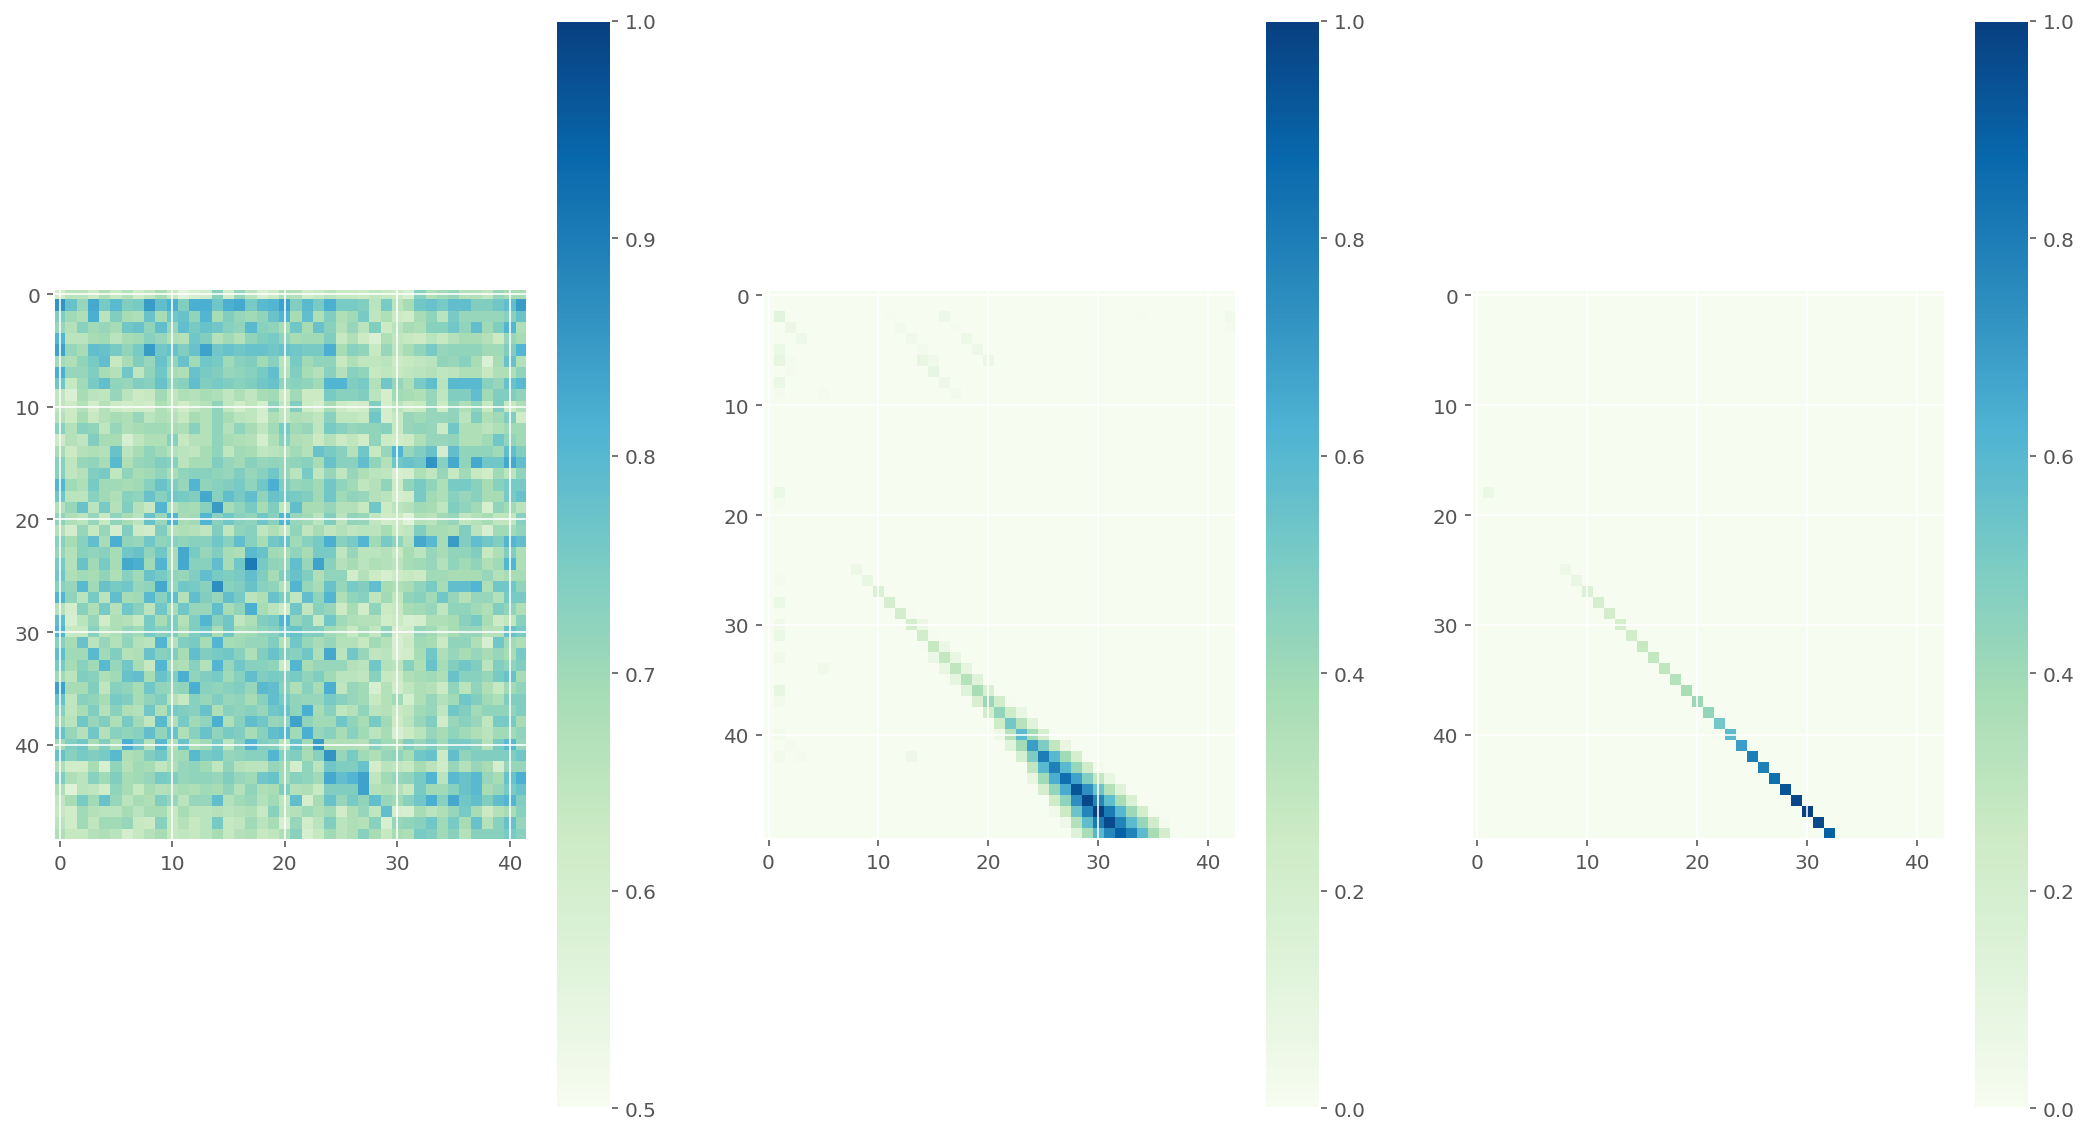

In [13]:
o._svs_read_alignment(720, 5128, 'r', plot=True)

/home/yoshihiko_s/.pyenv/versions/anaconda3-4.4.0/lib/python3.7/site-packages/matplotlib-3.0.2-py3.7-linux-x86_64.egg/matplotlib/figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



[1,
 18,
 42,
 48,
 65,
 65,
 0.8655913978494623,
 [array([ 1, 48]),
  array([ 2, 49]),
  array([ 3, 50]),
  array([ 4, 51]),
  array([ 5, 52]),
  array([ 6, 53]),
  array([ 7, 54]),
  array([ 8, 55]),
  array([ 9, 56]),
  array([10, 57]),
  array([11, 58]),
  array([12, 59]),
  array([13, 60]),
  array([14, 61]),
  array([15, 62]),
  array([16, 63]),
  array([17, 64]),
  array([18, 65])]]

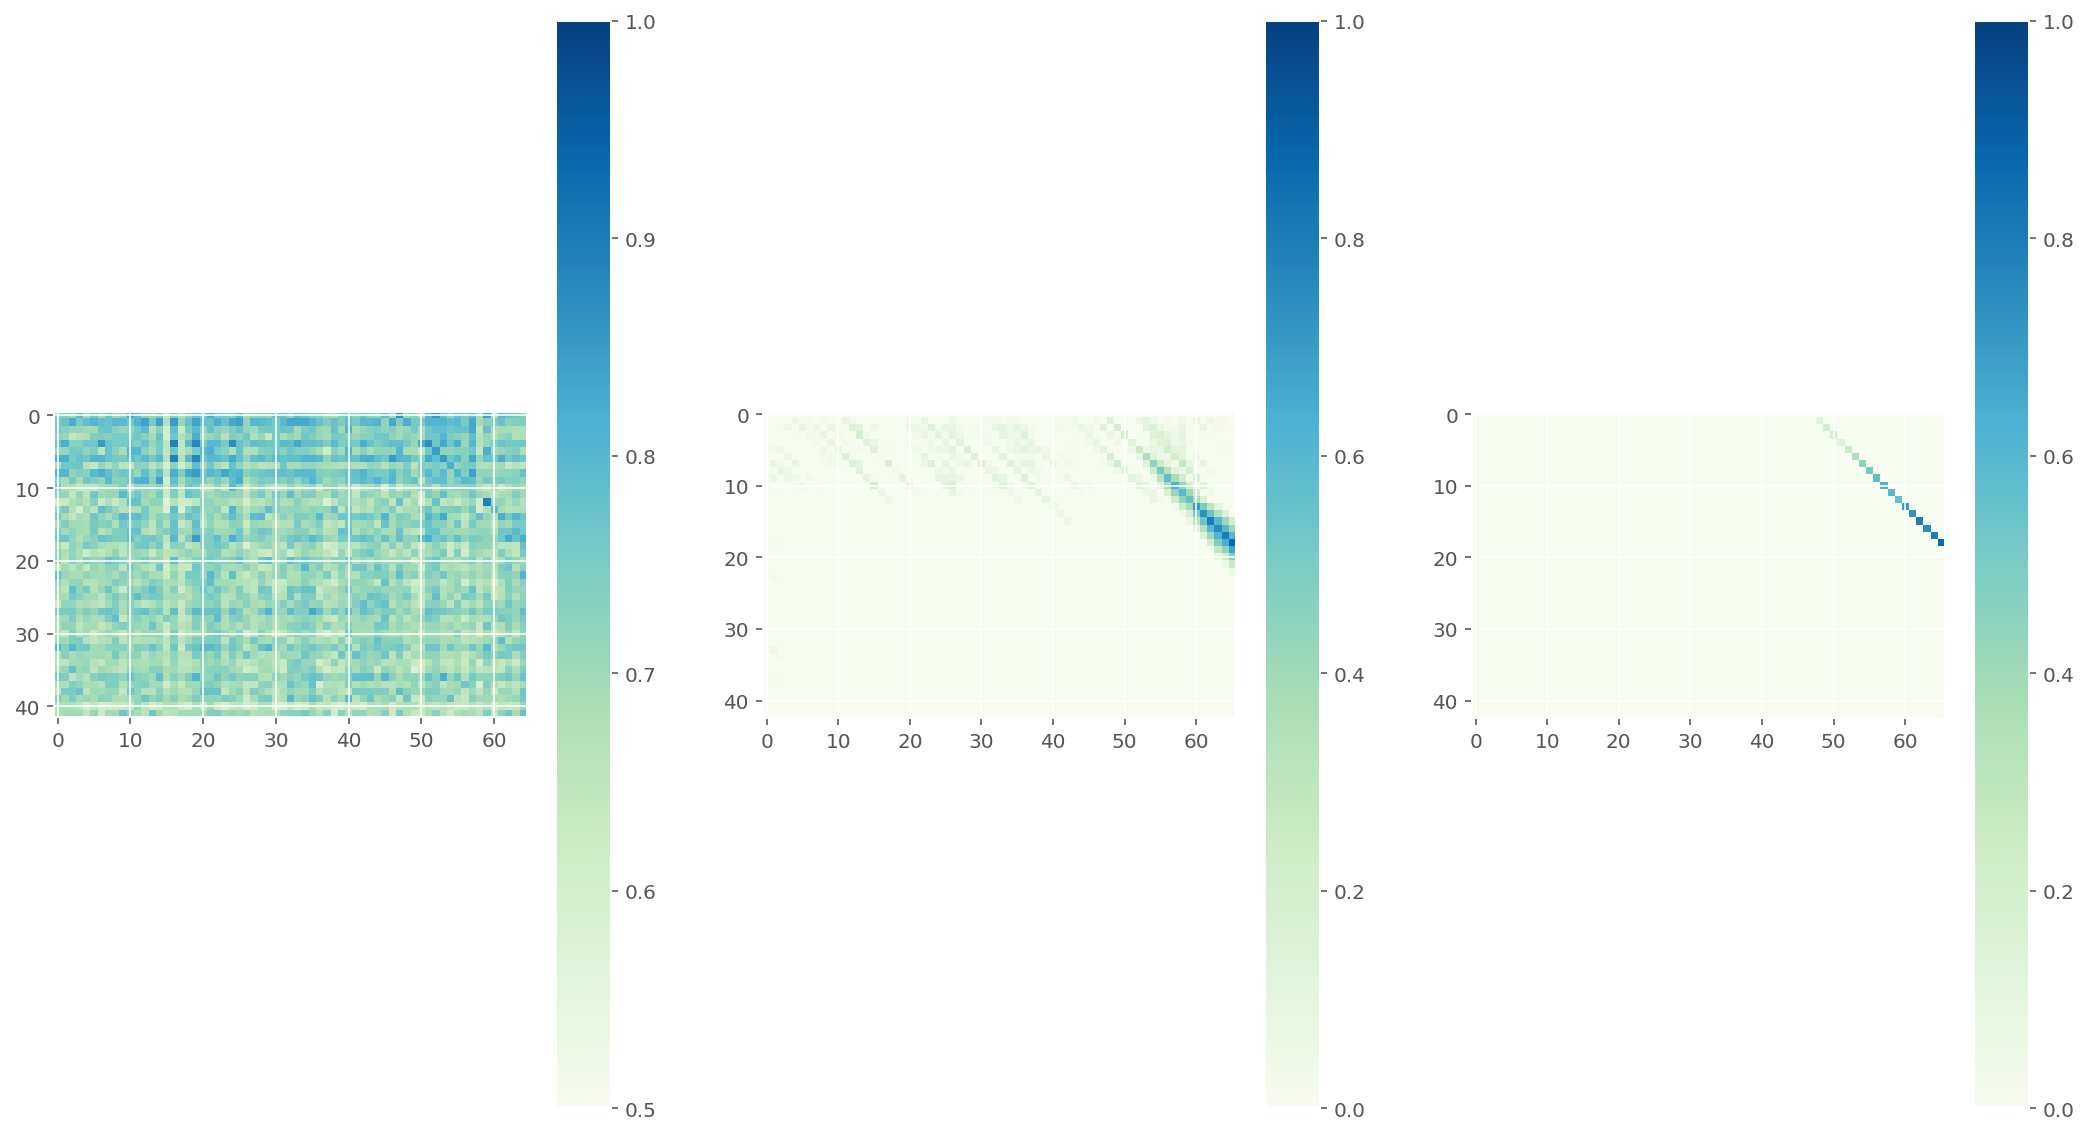

In [14]:
o._svs_read_alignment(5128, 6461, 'f', plot=True)